In [565]:
# Import required and needed libraries
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import random
import math

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle

from sklearn.metrics import classification_report

import seaborn as sns

%matplotlib inline

In [473]:
# Read xlsx file(dataset)
df = pd.read_excel('breast_cancer_dataset.xlsx')

# Print dataset and how many columns and fields there are
print(df.shape)
df.head(10)

(116, 10)


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,1
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083,1
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,1
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,1
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,1


In [474]:
# Print information about attributes in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
Age               116 non-null int64
BMI               116 non-null float64
Glucose           116 non-null int64
Insulin           116 non-null float64
HOMA              116 non-null float64
Leptin            116 non-null float64
Adiponectin       116 non-null float64
Resistin          116 non-null float64
MCP.1             116 non-null float64
Classification    116 non-null int64
dtypes: float64(7), int64(3)
memory usage: 9.1 KB


In [475]:
df.columns = ["Age", "BMI", "Glucose", "Insulin", "HOMA", "Leptin", "Adiponectin", "Resistin", "MCP_1", "Classification"]
df.head(10)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP_1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,1
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083,1
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,1
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,1
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,1


In [476]:
# Calculate missing values in dataframe
def calculate_missing_values(column, column_name):
    number_of_missing_values = df[pd.isnull(column)]
    print("Number of missing values for column `" + column_name + "` is: " + str(len(number_of_missing_values)))

In [477]:
# Check if there is any missing value in given dataset
print("Number of rows in df: ", len(df))
print()

df_missing_Age = calculate_missing_values(df.Age, 'Age')
df_missing_BMI = calculate_missing_values(df.BMI, 'BMI')
df_missing_Glucose = calculate_missing_values(df.Glucose, 'Glucose')
df_missing_Insulin = calculate_missing_values(df.Insulin, 'Insulin')
df_missing_HOMA = calculate_missing_values(df.HOMA, 'HOMA')
df_missing_Leptin = calculate_missing_values(df.Leptin, 'Leptin')
df_missing_Adiponectin = calculate_missing_values(df.Adiponectin, 'Adiponectin')
df_missing_Resistin = calculate_missing_values(df.Resistin, 'Resistin')
df_missing_MCP_1 = calculate_missing_values(df.MCP_1, 'MCP_1')
df_missing_Classification = calculate_missing_values(df.Classification, 'Classification')

print("\nNumber of rows in df: ", len(df))

Number of rows in df:  116

Number of missing values for column `Age` is: 0
Number of missing values for column `BMI` is: 0
Number of missing values for column `Glucose` is: 0
Number of missing values for column `Insulin` is: 0
Number of missing values for column `HOMA` is: 0
Number of missing values for column `Leptin` is: 0
Number of missing values for column `Adiponectin` is: 0
Number of missing values for column `Resistin` is: 0
Number of missing values for column `MCP_1` is: 0
Number of missing values for column `Classification` is: 0

Number of rows in df:  116


In [478]:
# Calculating Min-Max normalization
def calculte_min_max_normalization(column):
    normalization_result = (column - column.min()) / (column.max() - column.min())
    return normalization_result

In [479]:
df['Norm_Age'] = calculte_min_max_normalization(df.Age)
df['Norm_BMI'] = calculte_min_max_normalization(df.BMI)
df['Norm_Glucose'] = calculte_min_max_normalization(df.Glucose)
df['Norm_Insulin'] = calculte_min_max_normalization(df.Insulin)
df['Norm_HOMA'] = calculte_min_max_normalization(df.HOMA)
df['Norm_Leptin'] = calculte_min_max_normalization(df.Leptin)
df['Norm_Adiponectin'] = calculte_min_max_normalization(df.Adiponectin)
df['Norm_Resistin'] = calculte_min_max_normalization(df.Resistin)
df['Norm_MCP_1'] = calculte_min_max_normalization(df.MCP_1)

df.head(10)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP_1,Classification,Norm_Age,Norm_BMI,Norm_Glucose,Norm_Insulin,Norm_HOMA,Norm_Leptin,Norm_Adiponectin,Norm_Resistin,Norm_MCP_1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,0.369231,0.253850,0.070922,0.004908,0.000000,0.052299,0.221152,0.060665,0.224659
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,0.907692,0.114826,0.226950,0.012190,0.009742,0.052726,0.103707,0.010826,0.255926
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,0.892308,0.235278,0.219858,0.036874,0.022058,0.158526,0.571021,0.076906,0.307912
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,0.676923,0.148328,0.120567,0.014171,0.005911,0.064811,0.151538,0.121131,0.533934
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,0.953846,0.135640,0.226950,0.019936,0.013748,0.027782,0.086940,0.093375,0.440565
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,1,0.384615,0.221907,0.226950,0.014171,0.010767,0.029321,0.330468,0.090095,0.293215
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083,1,1.000000,0.214264,0.120567,0.040301,0.017222,0.030860,0.108120,0.123287,0.732326
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,1,0.800000,0.268695,0.411348,0.072071,0.057593,0.000000,0.318692,0.024011,0.142110
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,1,0.753846,0.179625,0.262411,0.016385,0.013592,0.001850,0.239191,0.038971,0.055072
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,1,0.784615,0.229109,0.163121,0.044978,0.022228,0.149077,0.272729,0.049199,0.164867


In [480]:
# Calculate qcut for relevance of the variable
def calculate_qcut_variable_relevance(column, number):
    relevance_result = pd.qcut(column, number)
    return relevance_result

In [482]:
df['sw_category_Age_qcut'] = calculate_qcut_variable_relevance(df.Age, 5)
df['sw_category_BMI_qcut'] = calculate_qcut_variable_relevance(df.BMI, 10)
df['sw_category_Glucose_qcut'] = calculate_qcut_variable_relevance(df.Glucose, 15)
df['sw_category_Insulin_qcut'] = calculate_qcut_variable_relevance(df.Insulin, 10)
df['sw_category_HOMA_qcut'] = calculate_qcut_variable_relevance(df.HOMA, 12)
df['sw_category_Leptin_qcut'] = calculate_qcut_variable_relevance(df.Leptin, 8)
df['sw_category_Adiponectin_qcut'] = calculate_qcut_variable_relevance(df.Adiponectin, 15)
df['sw_category_Resistin_qcut'] = calculate_qcut_variable_relevance(df.Resistin, 12)
df['sw_category_MCP_1_qcut'] = calculate_qcut_variable_relevance(df.MCP_1, 10)

df.head(10)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP_1,Classification,...,Norm_MCP_1,sw_category_Age_qcut,sw_category_BMI_qcut,sw_category_Glucose_qcut,sw_category_Insulin_qcut,sw_category_HOMA_qcut,sw_category_Leptin_qcut,sw_category_Adiponectin_qcut,sw_category_Resistin_qcut,sw_category_MCP_1_qcut
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,...,0.224659,"(44.0, 49.0]","(22.656, 23.56]","(59.999, 77.0]","(2.431, 3.226]","(0.466, 0.662]","(4.31, 8.821]","(8.5, 9.702]","(6.882, 8.097]","(378.996, 471.322]"
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,...,0.255926,"(73.0, 89.0]","(18.369, 21.208]","(90.0, 92.0]","(2.431, 3.226]","(0.662, 0.782]","(8.821, 12.314]","(5.066, 5.555]","(3.209, 4.516]","(378.996, 471.322]"
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,...,0.307912,"(73.0, 89.0]","(22.656, 23.56]","(90.0, 92.0]","(3.881, 4.514]","(0.918, 1.061]","(15.294, 20.271]","(21.655, 38.04]","(8.097, 9.926]","(471.322, 572.783]"
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,...,0.533934,"(65.0, 73.0]","(21.208, 22.656]","(59.999, 77.0]","(2.431, 3.226]","(0.466, 0.662]","(8.821, 12.314]","(6.725, 7.643]","(10.828, 12.988]","(926.053, 1698.44]"
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,...,0.440565,"(73.0, 89.0]","(18.369, 21.208]","(90.0, 92.0]","(3.226, 3.881]","(0.782, 0.918]","(4.31, 8.821]","(4.402, 5.066]","(9.926, 10.828]","(764.667, 926.053]"
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,1,...,0.293215,"(44.0, 49.0]","(22.656, 23.56]","(90.0, 92.0]","(2.431, 3.226]","(0.662, 0.782]","(4.31, 8.821]","(13.251, 17.92]","(9.926, 10.828]","(471.322, 572.783]"
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083,1,...,0.732326,"(73.0, 89.0]","(22.656, 23.56]","(59.999, 77.0]","(4.514, 5.376]","(0.782, 0.918]","(4.31, 8.821]","(5.555, 6.725]","(10.828, 12.988]","(926.053, 1698.44]"
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,1,...,0.142110,"(73.0, 89.0]","(23.56, 26.562]","(112.0, 132.0]","(5.924, 6.862]","(1.667, 2.246]","(4.31, 8.821]","(11.35, 13.251]","(4.516, 5.353]","(244.75, 313.89]"
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,1,...,0.055072,"(65.0, 73.0]","(21.208, 22.656]","(93.333, 97.0]","(3.226, 3.881]","(0.782, 0.918]","(4.31, 8.821]","(10.324, 11.35]","(5.353, 6.882]","(45.842000000000006, 198.728]"
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,1,...,0.164867,"(73.0, 89.0]","(22.656, 23.56]","(82.0, 84.0]","(4.514, 5.376]","(0.918, 1.061]","(15.294, 20.271]","(11.35, 13.251]","(6.882, 8.097]","(313.89, 378.996]"


In [483]:
# Calculate cut for relevance of the variable
def calculate_cut_variable_relevance(column, number):
    relevance_result = pd.cut(column, number)
    return relevance_result

In [484]:
df['sw_category_Age_cut'] = calculate_cut_variable_relevance(df.Age, 5)
df['sw_category_BMI_cut'] = calculate_cut_variable_relevance(df.BMI, 10)
df['sw_category_Glucose_cut'] = calculate_cut_variable_relevance(df.Glucose, 15)
df['sw_category_Insulin_cut'] = calculate_cut_variable_relevance(df.Insulin, 10)
df['sw_category_HOMA_cut'] = calculate_cut_variable_relevance(df.HOMA, 12)
df['sw_category_Leptin_cut'] = calculate_cut_variable_relevance(df.Leptin, 8)
df['sw_category_Adiponectin_cut'] = calculate_cut_variable_relevance(df.Adiponectin, 15)
df['sw_category_Resistin_cut'] = calculate_cut_variable_relevance(df.Resistin, 12)
df['sw_category_MCP_1_cut'] = calculate_cut_variable_relevance(df.MCP_1, 10)

df.head(10)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP_1,Classification,...,sw_category_MCP_1_qcut,sw_category_Age_cut,sw_category_BMI_cut,sw_category_Glucose_cut,sw_category_Insulin_cut,sw_category_HOMA_cut,sw_category_Leptin_cut,sw_category_Adiponectin_cut,sw_category_Resistin_cut,sw_category_MCP_1_cut
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,...,"(378.996, 471.322]","(37.0, 50.0]","(22.412, 24.433]","(69.4, 78.8]","(2.376, 8.035]","(0.443, 2.516]","(4.225, 15.057]","(8.933, 11.358]","(3.131, 9.784]","(376.362, 541.622]"
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,...,"(378.996, 471.322]","(76.0, 89.0]","(20.391, 22.412]","(88.2, 97.6]","(2.376, 8.035]","(0.443, 2.516]","(4.225, 15.057]","(4.082, 6.507]","(3.131, 9.784]","(376.362, 541.622]"
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,...,"(471.322, 572.783]","(76.0, 89.0]","(22.412, 24.433]","(88.2, 97.6]","(2.376, 8.035]","(0.443, 2.516]","(15.057, 25.803]","(21.061, 23.486]","(3.131, 9.784]","(541.622, 706.882]"
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,...,"(926.053, 1698.44]","(63.0, 76.0]","(20.391, 22.412]","(69.4, 78.8]","(2.376, 8.035]","(0.443, 2.516]","(4.225, 15.057]","(6.507, 8.933]","(9.784, 16.358]","(872.142, 1037.401]"
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,...,"(764.667, 926.053]","(76.0, 89.0]","(20.391, 22.412]","(88.2, 97.6]","(2.376, 8.035]","(0.443, 2.516]","(4.225, 15.057]","(4.082, 6.507]","(9.784, 16.358]","(706.882, 872.142]"
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,1,...,"(471.322, 572.783]","(37.0, 50.0]","(22.412, 24.433]","(88.2, 97.6]","(2.376, 8.035]","(0.443, 2.516]","(4.225, 15.057]","(11.358, 13.784]","(9.784, 16.358]","(376.362, 541.622]"
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083,1,...,"(926.053, 1698.44]","(76.0, 89.0]","(22.412, 24.433]","(69.4, 78.8]","(2.376, 8.035]","(0.443, 2.516]","(4.225, 15.057]","(4.082, 6.507]","(9.784, 16.358]","(1202.661, 1367.921]"
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,1,...,"(244.75, 313.89]","(63.0, 76.0]","(22.412, 24.433]","(116.4, 125.8]","(2.376, 8.035]","(0.443, 2.516]","(4.225, 15.057]","(11.358, 13.784]","(3.131, 9.784]","(211.103, 376.362]"
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,1,...,"(45.842000000000006, 198.728]","(63.0, 76.0]","(20.391, 22.412]","(88.2, 97.6]","(2.376, 8.035]","(0.443, 2.516]","(4.225, 15.057]","(8.933, 11.358]","(3.131, 9.784]","(44.19, 211.103]"
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,1,...,"(313.89, 378.996]","(63.0, 76.0]","(22.412, 24.433]","(78.8, 88.2]","(2.376, 8.035]","(0.443, 2.516]","(15.057, 25.803]","(11.358, 13.784]","(3.131, 9.784]","(211.103, 376.362]"


In [485]:
# Calculate classification value for every category of the variable that was calculated with qcut function
def calculate_qcut_classification(column):
    classification = df.Classification
    result = pd.crosstab(column, classification).apply(lambda c: c/c.sum(), axis=0)
    return result

In [487]:
age_cat = df.sw_category_Age_qcut
bmi_cat = df.sw_category_BMI_qcut
gluc_cat = df.sw_category_Glucose_qcut
ins_cat = df.sw_category_Insulin_qcut
homa_cat = df.sw_category_HOMA_qcut
lept_cat = df.sw_category_Leptin_qcut
adic_cat = df.sw_category_Adiponectin_qcut
rest_cat = df.sw_category_Resistin_qcut
mcp_cat = df.sw_category_MCP_1_qcut

IV_0_qcut = calculate_qcut_classification(age_cat)
IV_1_qcut = calculate_qcut_classification(bmi_cat)
IV_2_qcut = calculate_qcut_classification(gluc_cat)
IV_3_qcut = calculate_qcut_classification(ins_cat)
IV_4_qcut = calculate_qcut_classification(homa_cat)
IV_5_qcut = calculate_qcut_classification(lept_cat)
IV_6_qcut = calculate_qcut_classification(adic_cat)
IV_7_qcut = calculate_qcut_classification(rest_cat)
IV_8_qcut = calculate_qcut_classification(mcp_cat)

IV_0_qcut

Classification,1,2
sw_category_Age_qcut,,
"(23.999, 44.0]",0.288462,0.187500
"(44.0, 49.0]",0.076923,0.250000
"(49.0, 65.0]",0.134615,0.281250
"(65.0, 73.0]",0.211538,0.171875
"(73.0, 89.0]",0.288462,0.109375


In [488]:
# Calculate classification value for every category of the variable that was calculated with cut function
def calculate_cut_classification(column):
    classification = df.Classification
    result = pd.crosstab(column, classification).apply(lambda c: c/c.sum(), axis=0)
    return result

In [489]:
age_cat_cut = df.sw_category_Age_cut
bmi_cat_cut = df.sw_category_BMI_cut
gluc_cat_cut = df.sw_category_Glucose_cut
ins_cat_cut = df.sw_category_Insulin_cut
homa_cat_cut = df.sw_category_HOMA_cut
lept_cat_cut = df.sw_category_Leptin_cut
adic_cat_cut = df.sw_category_Adiponectin_cut
rest_cat_cut = df.sw_category_Resistin_cut
mcp_cat_cut = df.sw_category_MCP_1_cut

IV_0_cut = calculate_cut_classification(age_cat_cut)
IV_1_cut = calculate_cut_classification(bmi_cat_cut)
IV_2_cut = calculate_cut_classification(gluc_cat_cut)
IV_3_cut = calculate_cut_classification(ins_cat_cut)
IV_4_cut = calculate_cut_classification(homa_cat_cut)
IV_5_cut = calculate_cut_classification(lept_cat_cut)
IV_6_cut = calculate_cut_classification(adic_cat_cut)
IV_7_cut = calculate_cut_classification(rest_cat_cut)
IV_8_cut = calculate_cut_classification(mcp_cat_cut)

IV_4_cut

Classification,1,2
sw_category_HOMA_cut,,
"(0.443, 2.516]",0.865385,0.578125
"(2.516, 4.565]",0.096154,0.187500
"(4.565, 6.613]",0.019231,0.093750
"(6.613, 8.662]",0.019231,0.062500
"(8.662, 10.71]",0.000000,0.015625
"(12.759, 14.807]",0.000000,0.015625
"(14.807, 16.856]",0.000000,0.015625
"(18.905, 20.953]",0.000000,0.015625
"(23.002, 25.05]",0.000000,0.015625


In [490]:
# Calculate WoE for variable
def calculate_woe(column):
    woe_result = np.log(column[2] / column[1])
    return woe_result

In [491]:
# Calculate IV for variable
def calculate_iv(column):
    iv_result = (column[2] - column[1]) * np.log(column[2] / column[1])
    return iv_result

In [493]:
# Age
IV_0_qcut['WoE'] = calculate_woe(IV_0_qcut)
IV_0_qcut['IV'] = calculate_iv(IV_0_qcut)

IV_0_cut['WoE'] = calculate_woe(IV_0_cut)
IV_0_cut['IV'] = calculate_iv(IV_0_cut)

IV_0_qcut.to_csv('WoE_IV_Age_qcut.csv')
IV_0_cut.to_csv('WoE_IV_Age_cut.csv')

IV_0_cut

Classification,1,2,WoE,IV
sw_category_Age_cut,,,,
"(23.935, 37.0]",0.230769,0.015625,-2.692546,0.579286
"(37.0, 50.0]",0.153846,0.421875,1.008756,0.270376
"(50.0, 63.0]",0.096154,0.218750,0.821980,0.100772
"(63.0, 76.0]",0.365385,0.265625,-0.318865,0.031810
"(76.0, 89.0]",0.153846,0.078125,-0.677643,0.051312


In [492]:
# BMI
IV_1_qcut['WoE'] = calculate_woe(IV_1_qcut)
IV_1_qcut['IV'] = calculate_iv(IV_1_qcut)

IV_1_cut['WoE'] = calculate_woe(IV_1_cut)
IV_1_cut['IV'] = calculate_iv(IV_1_cut)

IV_1_qcut.to_csv('WoE_IV_BMI_qcut.csv')
IV_1_cut.to_csv('WoE_IV_BMI_cut.csv')

IV_1_cut

Classification,1,2,WoE,IV
sw_category_BMI_cut,,,,
"(18.35, 20.391]",0.019231,0.062500,1.178655,0.050999
"(20.391, 22.412]",0.134615,0.156250,0.149036,0.003224
"(22.412, 24.433]",0.173077,0.125000,-0.325422,0.015645
"(24.433, 26.454]",0.076923,0.046875,-0.495321,0.014883
"(26.454, 28.474]",0.115385,0.203125,0.565551,0.049622
"(28.474, 30.495]",0.134615,0.140625,0.043675,0.000262
"(30.495, 32.516]",0.115385,0.187500,0.485508,0.035013
"(32.516, 34.537]",0.057692,0.015625,-1.306252,0.054950
"(34.537, 36.558]",0.115385,0.046875,-0.900787,0.061713


In [494]:
# Glucose
IV_2_qcut['WoE'] = calculate_woe(IV_2_qcut)
IV_2_qcut['IV'] = calculate_iv(IV_2_qcut)

IV_2_cut['WoE'] = calculate_woe(IV_2_cut)
IV_2_cut['IV'] = calculate_iv(IV_2_cut)

IV_2_qcut.to_csv('WoE_IV_Glucose_qcut.csv')
IV_2_cut.to_csv('WoE_IV_Glucose_cut.csv')

IV_2_qcut

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Classification,1,2,WoE,IV
sw_category_Glucose_qcut,,,,
"(59.999, 77.0]",0.134615,0.046875,-1.054937,0.092561
"(77.0, 82.0]",0.115385,0.031250,-1.306252,0.109901
"(82.0, 84.0]",0.115385,0.015625,-1.999399,0.199459
"(84.0, 86.0]",0.096154,0.046875,-0.718465,0.035405
"(86.0, 88.0]",0.076923,0.046875,-0.495321,0.014883
"(88.0, 90.0]",0.115385,0.046875,-0.900787,0.061713
"(90.0, 92.0]",0.076923,0.093750,0.197826,0.003329
"(92.0, 93.333]",0.019231,0.031250,0.485508,0.005835
"(93.333, 97.0]",0.096154,0.093750,-0.025318,0.000061


In [495]:
# Insulin
IV_3_qcut['WoE'] = calculate_woe(IV_3_qcut)
IV_3_qcut['IV'] = calculate_iv(IV_3_qcut)

IV_3_cut['WoE'] = calculate_woe(IV_3_cut)
IV_3_cut['IV'] = calculate_iv(IV_3_cut)

IV_3_qcut.to_csv('WoE_IV_Insulin_qcut.csv')
IV_3_cut.to_csv('WoE_IV_Insulin_cut.csv')

IV_3_qcut

Classification,1,2,WoE,IV
sw_category_Insulin_qcut,,,,
"(2.431, 3.226]",0.096154,0.125000,0.262364,0.007568
"(3.226, 3.881]",0.115385,0.078125,-0.389961,0.014530
"(3.881, 4.514]",0.134615,0.062500,-0.767255,0.055331
"(4.514, 5.376]",0.134615,0.078125,-0.544112,0.030737
"(5.376, 5.924]",0.134615,0.062500,-0.767255,0.055331
"(5.924, 6.862]",0.134615,0.078125,-0.544112,0.030737
"(6.862, 9.922]",0.096154,0.093750,-0.025318,0.000061
"(9.922, 14.026]",0.057692,0.140625,0.890973,0.073891
"(14.026, 21.866]",0.057692,0.125000,0.773190,0.052042


In [496]:
# HOMA
IV_4_qcut['WoE'] = calculate_woe(IV_4_qcut)
IV_4_qcut['IV'] = calculate_iv(IV_4_qcut)

IV_4_cut['WoE'] = calculate_woe(IV_4_cut)
IV_4_cut['IV'] = calculate_iv(IV_4_cut)

IV_4_qcut.to_csv('WoE_IV_HOMA_qcut.csv')
IV_4_cut.to_csv('WoE_IV_HOMA_cut.csv')

IV_4_qcut

Classification,1,2,WoE,IV
sw_category_HOMA_qcut,,,,
"(0.466, 0.662]",0.076923,0.093750,0.197826,0.003329
"(0.662, 0.782]",0.096154,0.078125,-0.207639,0.003743
"(0.782, 0.918]",0.115385,0.046875,-0.900787,0.061713
"(0.918, 1.061]",0.134615,0.046875,-1.054937,0.092561
"(1.061, 1.227]",0.115385,0.046875,-0.900787,0.061713
"(1.227, 1.381]",0.115385,0.062500,-0.613104,0.032424
"(1.381, 1.667]",0.076923,0.093750,0.197826,0.003329
"(1.667, 2.246]",0.115385,0.046875,-0.900787,0.061713
"(2.246, 2.858]",0.038462,0.125000,1.178655,0.101999


In [497]:
# Leptin
IV_5_qcut['WoE'] = calculate_woe(IV_5_qcut)
IV_5_qcut['IV'] = calculate_iv(IV_5_qcut)

IV_5_cut['WoE'] = calculate_woe(IV_5_cut)
IV_5_cut['IV'] = calculate_iv(IV_5_cut)

IV_5_qcut.to_csv('WoE_IV_Leptin_qcut.csv')
IV_5_cut.to_csv('WoE_IV_Leptin_cut.csv')

IV_5_cut

Classification,1,2,WoE,IV
sw_category_Leptin_cut,,,,
"(4.225, 15.057]",0.326923,0.375000,0.137201,0.006596
"(15.057, 25.803]",0.269231,0.234375,-0.138646,0.004833
"(25.803, 36.549]",0.153846,0.125000,-0.207639,0.005990
"(36.549, 47.296]",0.115385,0.125000,0.080043,0.000770
"(47.296, 58.042]",0.057692,0.078125,0.303186,0.006195
"(58.042, 68.788]",0.038462,0.015625,-0.900787,0.020571
"(68.788, 79.534]",0.019231,0.015625,-0.207639,0.000749
"(79.534, 90.28]",0.019231,0.031250,0.485508,0.005835


In [498]:
# Adiponectin
IV_6_qcut['WoE'] = calculate_woe(IV_6_qcut)
IV_6_qcut['IV'] = calculate_iv(IV_6_qcut)

IV_6_cut['WoE'] = calculate_woe(IV_6_cut)
IV_6_cut['IV'] = calculate_iv(IV_6_cut)

IV_6_qcut.to_csv('WoE_IV_Adiponectin_qcut.csv')
IV_6_cut.to_csv('WoE_IV_Adiponectin_cut.csv')

IV_6_qcut

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Classification,1,2,WoE,IV
sw_category_Adiponectin_qcut,,,,
"(1.655, 3.708]",0.057692,0.078125,0.303186,0.006195
"(3.708, 4.402]",0.038462,0.093750,0.890973,0.049261
"(4.402, 5.066]",0.115385,0.031250,-1.306252,0.109901
"(5.066, 5.555]",0.057692,0.062500,0.080043,0.000385
"(5.555, 6.725]",0.038462,0.093750,0.890973,0.049261
"(6.725, 7.643]",0.115385,0.031250,-1.306252,0.109901
"(7.643, 8.129]",0.076923,0.046875,-0.495321,0.014883
"(8.129, 8.5]",0.057692,0.078125,0.303186,0.006195
"(8.5, 9.702]",0.096154,0.046875,-0.718465,0.035405


In [499]:
# Resistin
IV_7_qcut['WoE'] = calculate_woe(IV_7_qcut)
IV_7_qcut['IV'] = calculate_iv(IV_7_qcut)

IV_7_cut['WoE'] = calculate_woe(IV_7_cut)
IV_7_cut['IV'] = calculate_iv(IV_7_cut)

IV_7_qcut.to_csv('WoE_IV_Resistin_qcut.csv')
IV_7_cut.to_csv('WoE_IV_Resistin_cut.csv')

IV_7_qcut

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Classification,1,2,WoE,IV
sw_category_Resistin_qcut,,,,
"(3.209, 4.516]",0.115385,0.062500,-0.613104,0.032424
"(4.516, 5.353]",0.096154,0.078125,-0.207639,0.003743
"(5.353, 6.882]",0.115385,0.046875,-0.900787,0.061713
"(6.882, 8.097]",0.115385,0.062500,-0.613104,0.032424
"(8.097, 9.926]",0.134615,0.031250,-1.460402,0.150955
"(9.926, 10.828]",0.096154,0.078125,-0.207639,0.003743
"(10.828, 12.988]",0.096154,0.078125,-0.207639,0.003743
"(12.988, 15.714]",0.019231,0.125000,1.871802,0.197979
"(15.714, 17.755]",0.076923,0.093750,0.197826,0.003329


In [500]:
# MCP_1
IV_8_qcut['WoE'] = calculate_woe(IV_8_qcut)
IV_8_qcut['IV'] = calculate_iv(IV_8_qcut)

IV_8_cut['WoE'] = calculate_woe(IV_8_cut)
IV_8_cut['IV'] = calculate_iv(IV_8_cut)

IV_8_qcut.to_csv('WoE_IV_MCP_1_qcut.csv')
IV_8_cut.to_csv('WoE_IV_MCP_1_cut.csv')

IV_8_qcut

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Classification,1,2,WoE,IV
sw_category_MCP_1_qcut,,,,
"(45.842000000000006, 198.728]",0.115385,0.093750,-0.207639,0.004492
"(198.728, 244.75]",0.115385,0.093750,-0.207639,0.004492
"(244.75, 313.89]",0.096154,0.093750,-0.025318,0.000061
"(313.89, 378.996]",0.115385,0.093750,-0.207639,0.004492
"(378.996, 471.322]",0.057692,0.125000,0.773190,0.052042
"(471.322, 572.783]",0.115385,0.093750,-0.207639,0.004492
"(572.783, 636.655]",0.134615,0.062500,-0.767255,0.055331
"(636.655, 764.667]",0.076923,0.125000,0.485508,0.023342
"(764.667, 926.053]",0.076923,0.109375,0.351976,0.011422


In [501]:
# Calcualte IV sum for the variable
def calcualte_iv_sum(column):
    iv_sum = column['IV'].sum()
    return iv_sum

In [502]:
print("IV sum value for Age qcut is: " + str(calcualte_iv_sum(IV_0_qcut)))
print("IV sum value for Age cut is: " + str(calcualte_iv_sum(IV_0_cut)))

IV sum value for Age qcut is: 0.5374442672418622
IV sum value for Age cut is: 1.033554789117214


In [391]:
print("IV sum value for BMI qcut is: " + str(calcualte_iv_sum(IV_1_qcut)))
print("IV sum value for BMI cut is: " + str(calcualte_iv_sum(IV_1_cut)))

IV sum value for BMI qcut is: 0.5264049269781576
IV sum value for BMI cut is: 0.3412627807013138


In [503]:
print("IV sum value for Glucose qcut is: " + str(calcualte_iv_sum(IV_2_qcut)))
print("IV sum value for Glucose cut is: " + str(calcualte_iv_sum(IV_2_cut)))

IV sum value for Glucose qcut is: inf
IV sum value for Glucose cut is: inf


In [504]:
print("IV sum value for Insulin qcut is: " + str(calcualte_iv_sum(IV_3_qcut)))
print("IV sum value for Insulin cut is: " + str(calcualte_iv_sum(IV_3_cut)))

IV sum value for Insulin qcut is: 0.4853429069096937
IV sum value for Insulin cut is: inf


In [505]:
print("IV sum value for HOMA qcut is: " + str(calcualte_iv_sum(IV_4_qcut)))
print("IV sum value for HOMA cut is: " + str(calcualte_iv_sum(IV_4_cut)))

IV sum value for HOMA qcut is: 0.7835515447077226
IV sum value for HOMA cut is: inf


In [506]:
print("IV sum value for Leptin qcut is: " + str(calcualte_iv_sum(IV_5_qcut)))
print("IV sum value for Leptin cut is: " + str(calcualte_iv_sum(IV_5_cut)))

IV sum value for Leptin qcut is: 0.12096726347523404
IV sum value for Leptin cut is: 0.051537964661565


In [507]:
print("IV sum value for Adiponectin qcut is: " + str(calcualte_iv_sum(IV_6_qcut)))
print("IV sum value for Adiponectin cut is: " + str(calcualte_iv_sum(IV_6_cut)))

IV sum value for Adiponectin qcut is: 0.5783309565877263
IV sum value for Adiponectin cut is: inf


In [508]:
print("IV sum value for Resistin qcut is: " + str(calcualte_iv_sum(IV_7_qcut)))
print("IV sum value for Resistin cut is: " + str(calcualte_iv_sum(IV_7_cut)))

IV sum value for Resistin qcut is: 0.8335953379089921
IV sum value for Resistin cut is: inf


In [509]:
print("IV sum value for MCP_1 qcut is: " + str(calcualte_iv_sum(IV_8_qcut)))
print("IV sum value for MCP_1 cut is: " + str(calcualte_iv_sum(IV_8_cut)))

IV sum value for MCP_1 qcut is: 0.16186953176764626
IV sum value for MCP_1 cut is: inf


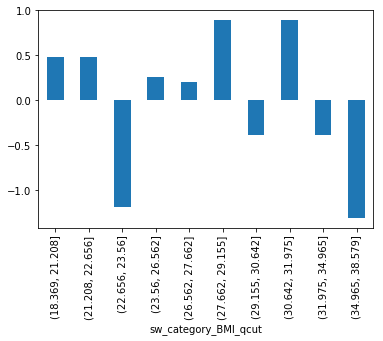

In [400]:
# Show the results graphically
IV_1_qcut['WoE'].plot(kind='bar')
p.show()

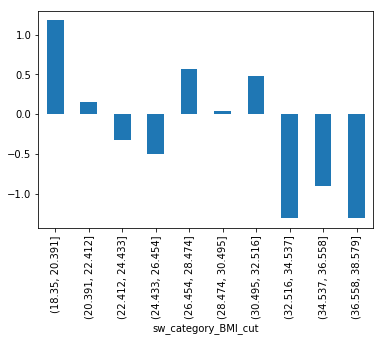

In [401]:
IV_1_cut['WoE'].plot(kind='bar')
p.show()

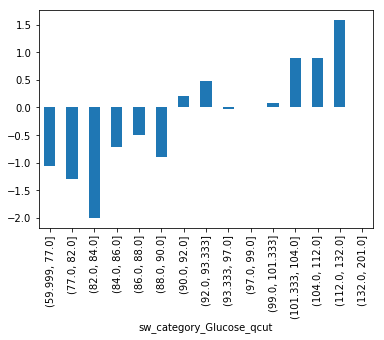

In [402]:
IV_2_qcut['WoE'].plot(kind='bar')
p.show()

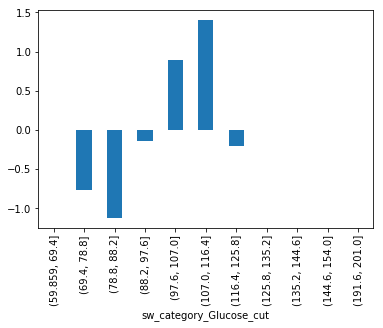

In [403]:
IV_2_cut['WoE'].plot(kind='bar')
p.show()

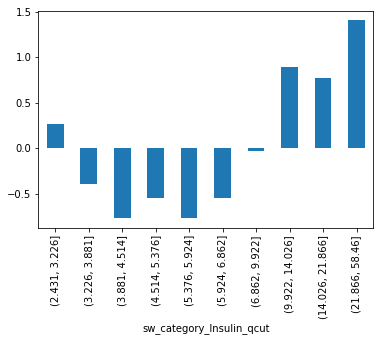

In [404]:
IV_3_qcut['WoE'].plot(kind='bar')
p.show()

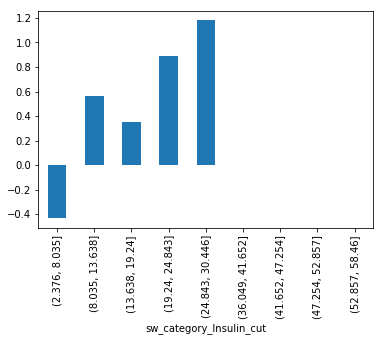

In [405]:
IV_3_cut['WoE'].plot(kind='bar')
p.show()

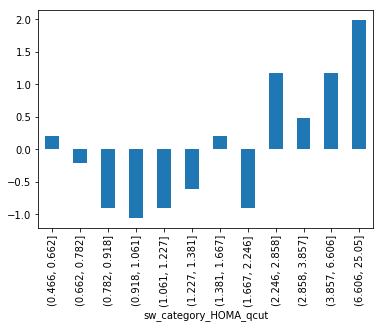

In [406]:
IV_4_qcut['WoE'].plot(kind='bar')
p.show()

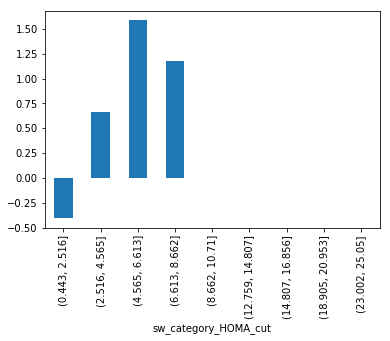

In [407]:
IV_4_cut['WoE'].plot(kind='bar')
p.show()

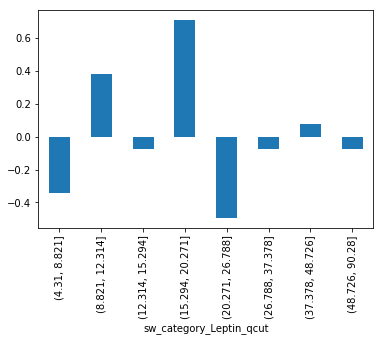

In [408]:
IV_5_qcut['WoE'].plot(kind='bar')
p.show()

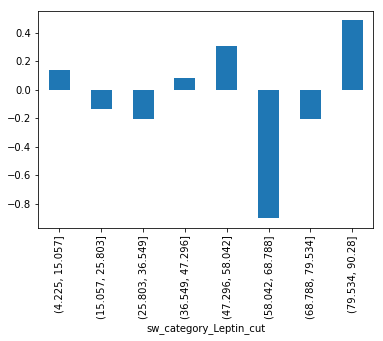

In [409]:
IV_5_cut['WoE'].plot(kind='bar')
p.show()

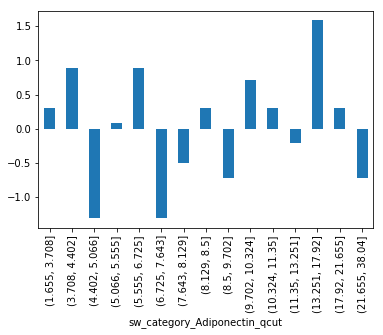

In [410]:
IV_6_qcut['WoE'].plot(kind='bar')
p.show()

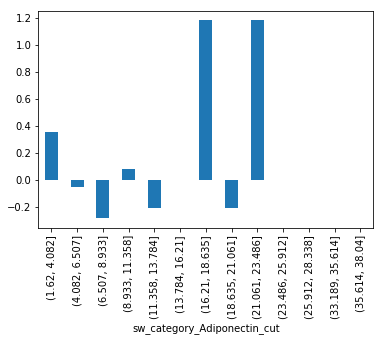

In [411]:
IV_6_cut['WoE'].plot(kind='bar')
p.show()

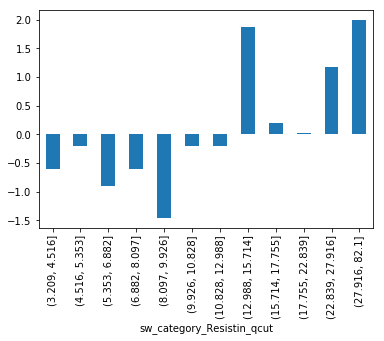

In [412]:
IV_7_qcut['WoE'].plot(kind='bar')
p.show()

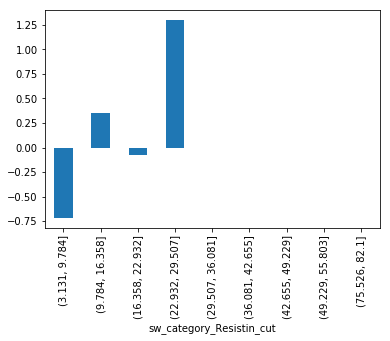

In [413]:
IV_7_cut['WoE'].plot(kind='bar')
p.show()

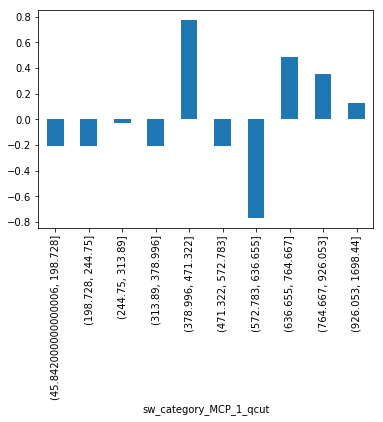

In [414]:
IV_8_qcut['WoE'].plot(kind='bar')
p.show()

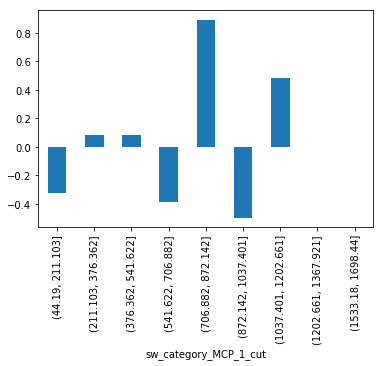

In [415]:
IV_8_cut['WoE'].plot(kind='bar')
p.show()

In [517]:
new_df = df[['Age', 'BMI', 'HOMA', 'Adiponectin', 'Resistin', 'Classification']].copy()

a = new_df.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
b = new_df.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(a, b)  # perform linear regression
Y_pred = linear_regressor.predict(a)  # make predictions

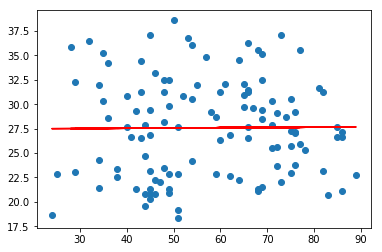

In [518]:
plt.scatter(a, b)
plt.plot(a, Y_pred, color='red')
plt.show()

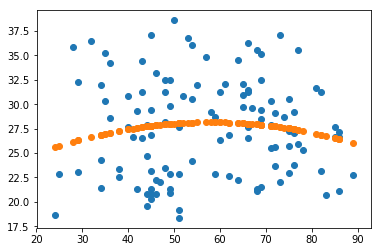

In [524]:
from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree = 2)
X_poly = pr.fit_transform(a)
pr.fit(X_poly, b)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, b)
plt.scatter(a, b)

plt.scatter(a, lin_reg.predict(pr.fit_transform(a)))

plt.show()

In [540]:
new_df_lr = df[['Age', 'BMI', 'HOMA', 'Adiponectin', 'Resistin', 'Classification']].copy()

print(new_df_lr.head(5))
new_df_lr.shape

   Age        BMI      HOMA  Adiponectin  Resistin  Classification
0   48  23.500000  0.467409     9.702400   7.99585               1
1   83  20.690495  0.706897     5.429285   4.06405               1
2   82  23.124670  1.009651    22.432040   9.27715               1
3   68  21.367521  0.612725     7.169560  12.76600               1
4   86  21.111111  0.805386     4.819240  10.57635               1


(116, 6)

In [541]:
array = new_df_lr.values
array[0]

array([48.        , 23.5       ,  0.46740867,  9.7024    ,  7.99585   ,
        1.        ])

In [542]:
# assign input features to X
z = array[:,0:5]

# assign target variable to y
w = array[:,5]

print(z[0:5])
print(w[0:5])

[[48.         23.5         0.46740867  9.7024      7.99585   ]
 [83.         20.69049454  0.70689733  5.429285    4.06405   ]
 [82.         23.12467037  1.00965107 22.43204     9.27715   ]
 [68.         21.36752137  0.61272493  7.16956    12.766     ]
 [86.         21.11111111  0.8053864   4.81924    10.57635   ]]
[1. 1. 1. 1. 1.]


In [543]:
# define the sample size that we'll use for testing
test_size = 0.33

# create random generator seed
seed = 7

In [544]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

In [562]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [546]:
print(model.score(X_test, y_test))

# list the coefficients of respective variables
print(model.coef_)

0.5897435897435898
[[-0.00711157 -0.08983185  0.42248908  0.04948626  0.03892526]]


In [547]:
filename = 'linear_regression_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [549]:
filename = 'linear_regression_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [550]:
print(loaded_model.score(X_test, y_test))
print(loaded_model.coef_)

0.5897435897435898
[[-0.00711157 -0.08983185  0.42248908  0.04948626  0.03892526]]


In [563]:
# Checking precision, recall, f1-score using classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.48      0.67      0.56        15
           2       0.72      0.54      0.62        24

   micro avg       0.59      0.59      0.59        39
   macro avg       0.60      0.60      0.59        39
weighted avg       0.63      0.59      0.59        39



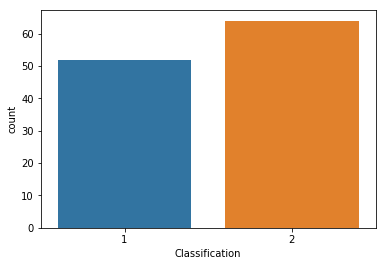

In [553]:
sns.countplot(x='Classification',data=new_df_lr)

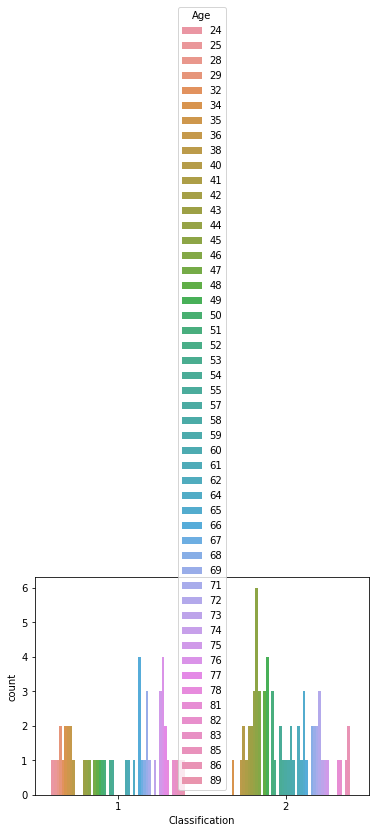

In [554]:
sns.countplot(x='Classification',hue='Age',data=new_df_lr)